# Title Heart Disease Prediction

`Author:` [M.Asher](www.linkedin.com/in/muhammad-asher-haseeb-ab2ba51b2)\
`Date:` 03.Jan.2025\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

Here’s a beautifully formatted Markdown version for your reference:

```markdown
# Meta-Data (About Dataset)

## Context
This is a multivariate dataset, meaning it involves a variety of separate mathematical or statistical variables for multivariate numerical data analysis. It is composed of 14 key attributes:  

- Age  
- Sex  
- Chest pain type  
- Resting blood pressure  
- Serum cholesterol  
- Fasting blood sugar  
- Resting electrocardiographic results  
- Maximum heart rate achieved  
- Exercise-induced angina  
- Oldpeak (ST depression induced by exercise relative to rest)  
- The slope of the peak exercise ST segment  
- Number of major vessels  
- Thalassemia  

Although the database contains 76 attributes, all published studies focus on a subset of 14. The Cleveland database is the primary one used by machine learning researchers to date.  

### Key Tasks:
1. Predict whether a patient has heart disease based on the given attributes.  
2. Perform exploratory analysis to derive insights that can help understand the problem better.

---

## Content

### Column Descriptions:
- **id**: Unique ID for each patient  
- **age**: Age of the patient in years  
- **origin**: Place of study  
- **sex**: Male/Female  
- **cp**: Chest pain type  
  - Typical angina  
  - Atypical angina  
  - Non-anginal pain  
  - Asymptomatic  
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
- **chol**: Serum cholesterol in mg/dl  
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = True; 0 = False)  
- **restecg**: Resting electrocardiographic results  
  - Normal  
  - ST-T wave abnormality  
  - Left ventricular hypertrophy  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina (1 = Yes; 0 = No)  
- **oldpeak**: ST depression induced by exercise relative to rest  
- **slope**: The slope of the peak exercise ST segment  
- **ca**: Number of major vessels (0–3) colored by fluoroscopy  
- **thal**:  
  - Normal  
  - Fixed defect  
  - Reversible defect  
- **num**: The predicted attribute (presence of heart disease)

---

## Acknowledgements

### Creators:
- Hungarian Institute of Cardiology, Budapest: **Andras Janosi, M.D.**  
- University Hospital, Zurich, Switzerland: **William Steinbrunn, M.D.**  
- University Hospital, Basel, Switzerland: **Matthias Pfisterer, M.D.**  
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: **Robert Detrano, M.D., Ph.D.**

---

## Relevant Papers:
- **Detrano, R., et al. (1989)**:  
  _International application of a new probability algorithm for the diagnosis of coronary artery disease._  
  American Journal of Cardiology, 64, 304–310.  

- **David W. Aha & Dennis Kibler**:  
  _Instance-based prediction of heart-disease presence with the Cleveland database._  

- **Gennari, J.H., Langley, P., & Fisher, D. (1989)**:  
  _Models of incremental concept formation._  
  Artificial Intelligence, 40, 11–61.  

---

## Citation Request:
The authors request that any publications resulting from the use of this dataset include the names of the principal investigators responsible for data collection at each institution:  

- Hungarian Institute of Cardiology, Budapest: **Andras Janosi, M.D.**  
- University Hospital, Zurich, Switzerland: **William Steinbrunn, M.D.**  
- University Hospital, Basel, Switzerland: **Matthias Pfisterer, M.D.**  
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: **Robert Detrano, M.D., Ph.D.**
``` 

## Aims and Objective:

We will fill this aftr EDA

### Import libraries
Let's start by importing the libraries we will need.


In [101]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [102]:
### Load the dataset from the csv file in PC
df = pd.read_csv('heart_disease_uci.csv')
# Print the First 5 rows of the data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore Each Column

In [103]:
# Exploring the DataType of Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [104]:
# Data Shape
df.shape

(920, 16)

In [105]:
# id Column
df['id'].min(), df['id'].max()

(1, 920)

In [106]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

In [107]:
# Let's Summarize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

#### Outputs
1. Minimum age to have a Heart Disease Starts from 28 to 77
2. Most of the People get Heart Diseases at the age of 53-54 Years

<Axes: xlabel='age', ylabel='Count'>

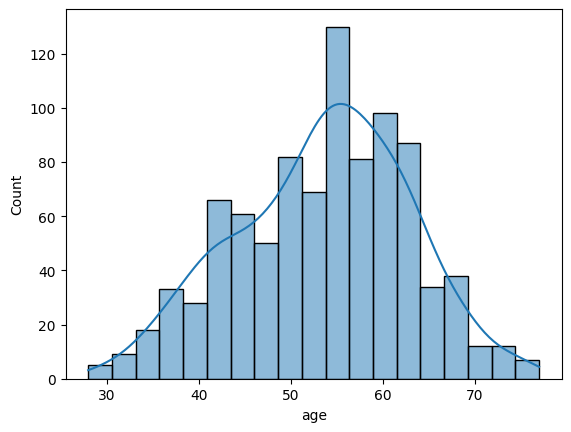

In [108]:
# Draw Histogram to see the distribution of age
sns.histplot(df['age'], kde=True)

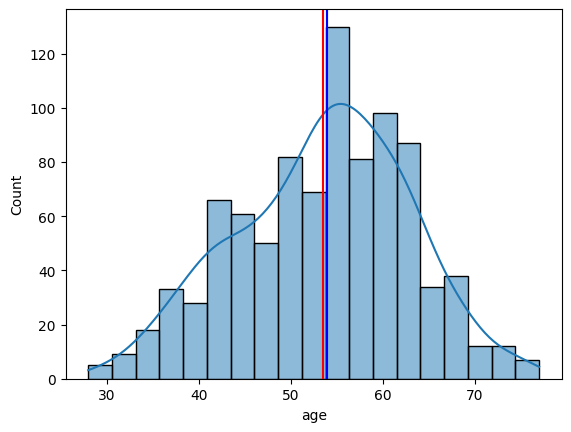

In [109]:
# plot the mean median and mode of the age column
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

In [110]:
# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())    
print('Median:', df['age'].median())    
print('Mode:', df['age'].mode()[0])

Mean: 53.51086956521739
Median: 54.0
Mode: 54


Lets Explore the GEnder Based Distribution of the Dataset for Age Column

In [111]:
# PLot the Histogram of age column and color by sex column
fig = px.histogram(df, x='age', color='sex')
fig.show()

Most of the Males and Females are with Heart Disease at 54-55 years

In [112]:
# Find the Value of Sex Columns
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [113]:
# Calculate the Percentages of the Male and Female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count
# Calculate the male percentage
male_percentage = (male_count / total_count) * 100
# Calculate the female percentage
female_percentage = (female_count / total_count) * 100
print(f"Male Percentage: {male_percentage:.2f}%")
print(f"Female Percentage: {female_percentage:.2f}%")

# Difference 
diffeerence_percentage = (male_count - female_count) / female_count * 100
# Print the difference
print(f"Difference: {diffeerence_percentage:.2f}%")

Male Percentage: 78.91%
Female Percentage: 21.09%
Difference: 274.23%


4. Male Percentage in the Data**: 78.91%  
5. Female Percentage in the Data**: 21.09%  
6. Males are 274.23% more than females in the data.

In [114]:
# Find the VAlue count of the age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [115]:
# lets deal with datset solumn
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [116]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

#### Output
7. We have Highest Numbers of People from Cleveland (304) and lowest from Switzerland(123)

In [117]:
# PLot the count plot of dataset column
#sns.countplot(df, x='dataset', hue='sex')

# Better Plot with PLotly
# make a count plot using plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()
# print the value counts of the dataset column grouped by sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

- The Highest number of females in this data are from Cleveland (97) and lowest from VA Long Beach(6) 
- The Highest number of Males in this data are from HUngry (212) and lowest from Switzerland (113) 

In [118]:
# make aplot of age column using plotly and color by dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("Mean of Data Set:", df.groupby('dataset')['age'].mean())
print("---------------------------------------------")   
print("Median of Data Set:",df.groupby('dataset')['age'].median())
print("---------------------------------------------")  
print("Mode of Data Set:",df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
---------------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
---------------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


Here’s a polished Markdown version of your output for clarity and presentation:

```markdown
## Age Analysis by Country

### Mean Age of Each Country:
- **Cleveland**: 54.35  
- **Hungary**: 47.89  
- **Switzerland**: 55.32  
- **VA Long Beach**: 59.35  

### Median Age of Each Country:
- **Cleveland**: 55.5  
- **Hungary**: 49.0  
- **Switzerland**: 56.0  
- **VA Long Beach**: 60.0  

### Mode Age of Each Country:
- **Cleveland**: 58  
- **Hungary**: 54  
- **Switzerland**: 61  
- **VA Long Beach**: [62, 63]  
```

This format makes your data visually appealing and easy to understand for readers!

Lets explore CP (Chest Pain) Column:

In [119]:
# value count of the cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

## Chest Pain Type Distribution (cp Column)

- **Asymptomatic**: 496  
- **Non-anginal**: 204  
- **Atypical Angina**: 174  
- **Typical Angina**: 46  


<Axes: xlabel='cp', ylabel='count'>

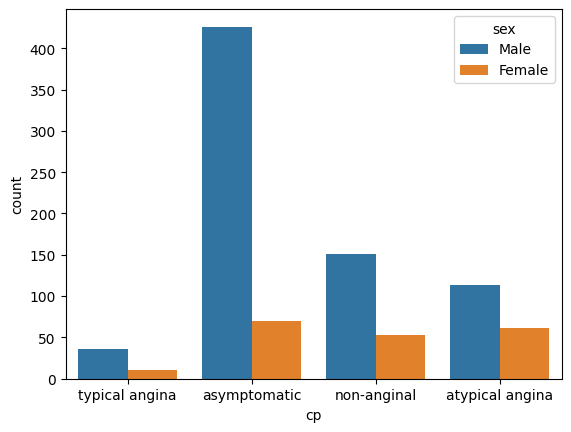

In [120]:
# Count plot of cp column by sex
sns.countplot(df, x='cp', hue='sex')

## Observation from the Plot

This plot shows the **highest rate of asymptomatic cases in males compared to females**.  

> **Note**: I am not providing my analysis on this observation because the dataset lacks sufficient data on females. Therefore, my conclusion may not be accurate.

<Axes: xlabel='cp', ylabel='count'>

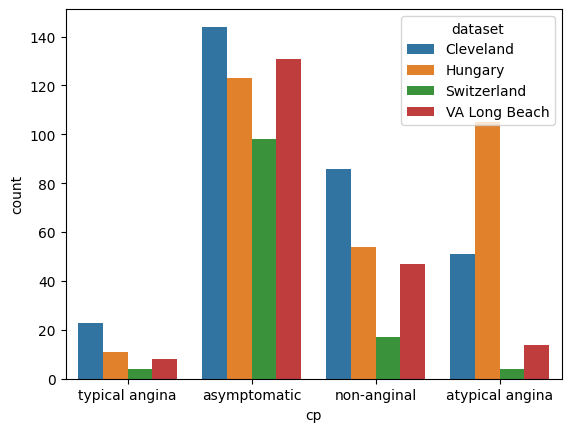

In [121]:
# Count PLot of Cp Column by the Datset Column
sns.countplot(df, x='cp', hue='dataset')

In [122]:
# Draw the PLot of Age Column Grouped by CP Column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

# Analysis of Chest Pain Types

## Typical Angina
- **High**: Observed at age 62–63 with 6 counts.  
- **Absent**: No typical angina cases between ages 36–37 and 70–73.  

## Asymptomatic
- **High**: Observed at age 56–57 with 47 counts.  
- **Low**: Observed at age 30–31 with 1 count and at age 74–75 with 5 counts.  

## Non-Anginal
- **High**: Observed at age 54–55 with 19 counts.  
- **Low**: Observed at age 32–35 with 1 count and at age 74–75 with 2 counts.  

## Atypical Angina
- **High**: Observed at age 54–55 with 28 counts.  
- **Absent**: No atypical angina cases between ages 64–65, 68–69, and 72–73.  

#### Lets Explore the trestbps(Resting Blood Pressure) Column:
The Normal Resting Blood Pressure is 120/80 mm Hg.
`Write here, what will happen if the blood pressure is high or low and you can bin the data based on those values.`

In [123]:
# we have to Summarize trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

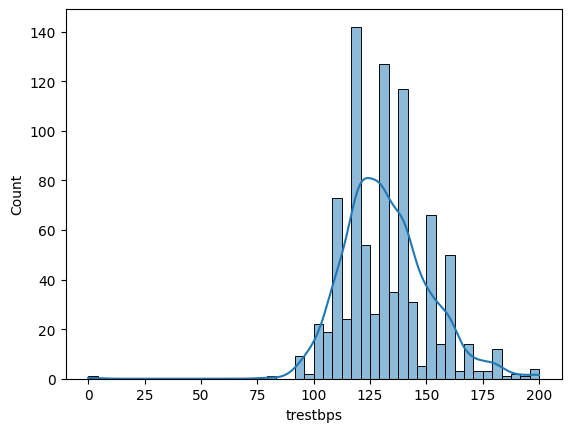

In [124]:
# Create a Histplot of trsetbps column
sns.histplot(df['trestbps'], kde=True) 

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

We are going to make a function to deal with missing values.

In [125]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [126]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [127]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [128]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [129]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.196936416184972 

RMSE = 17.10522110401795 

R2 = 0.0864439842315865 

Missing Values chol : 3.26%
MAE = 45.30044943820224 

RMSE = 64.11727051779174 

R2 = 0.6743367912245795 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 60.87 accuracy

Missing Values thalch : 5.98%
MAE = 16.934393063583816 

RMSE = 21.849487672728017 

R2 = 0.3058204273379532 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5581918604651163 

RMSE = 0.7783724335745948 

R2 = 0.42279133858698803 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.85 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 67.74 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [130]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>

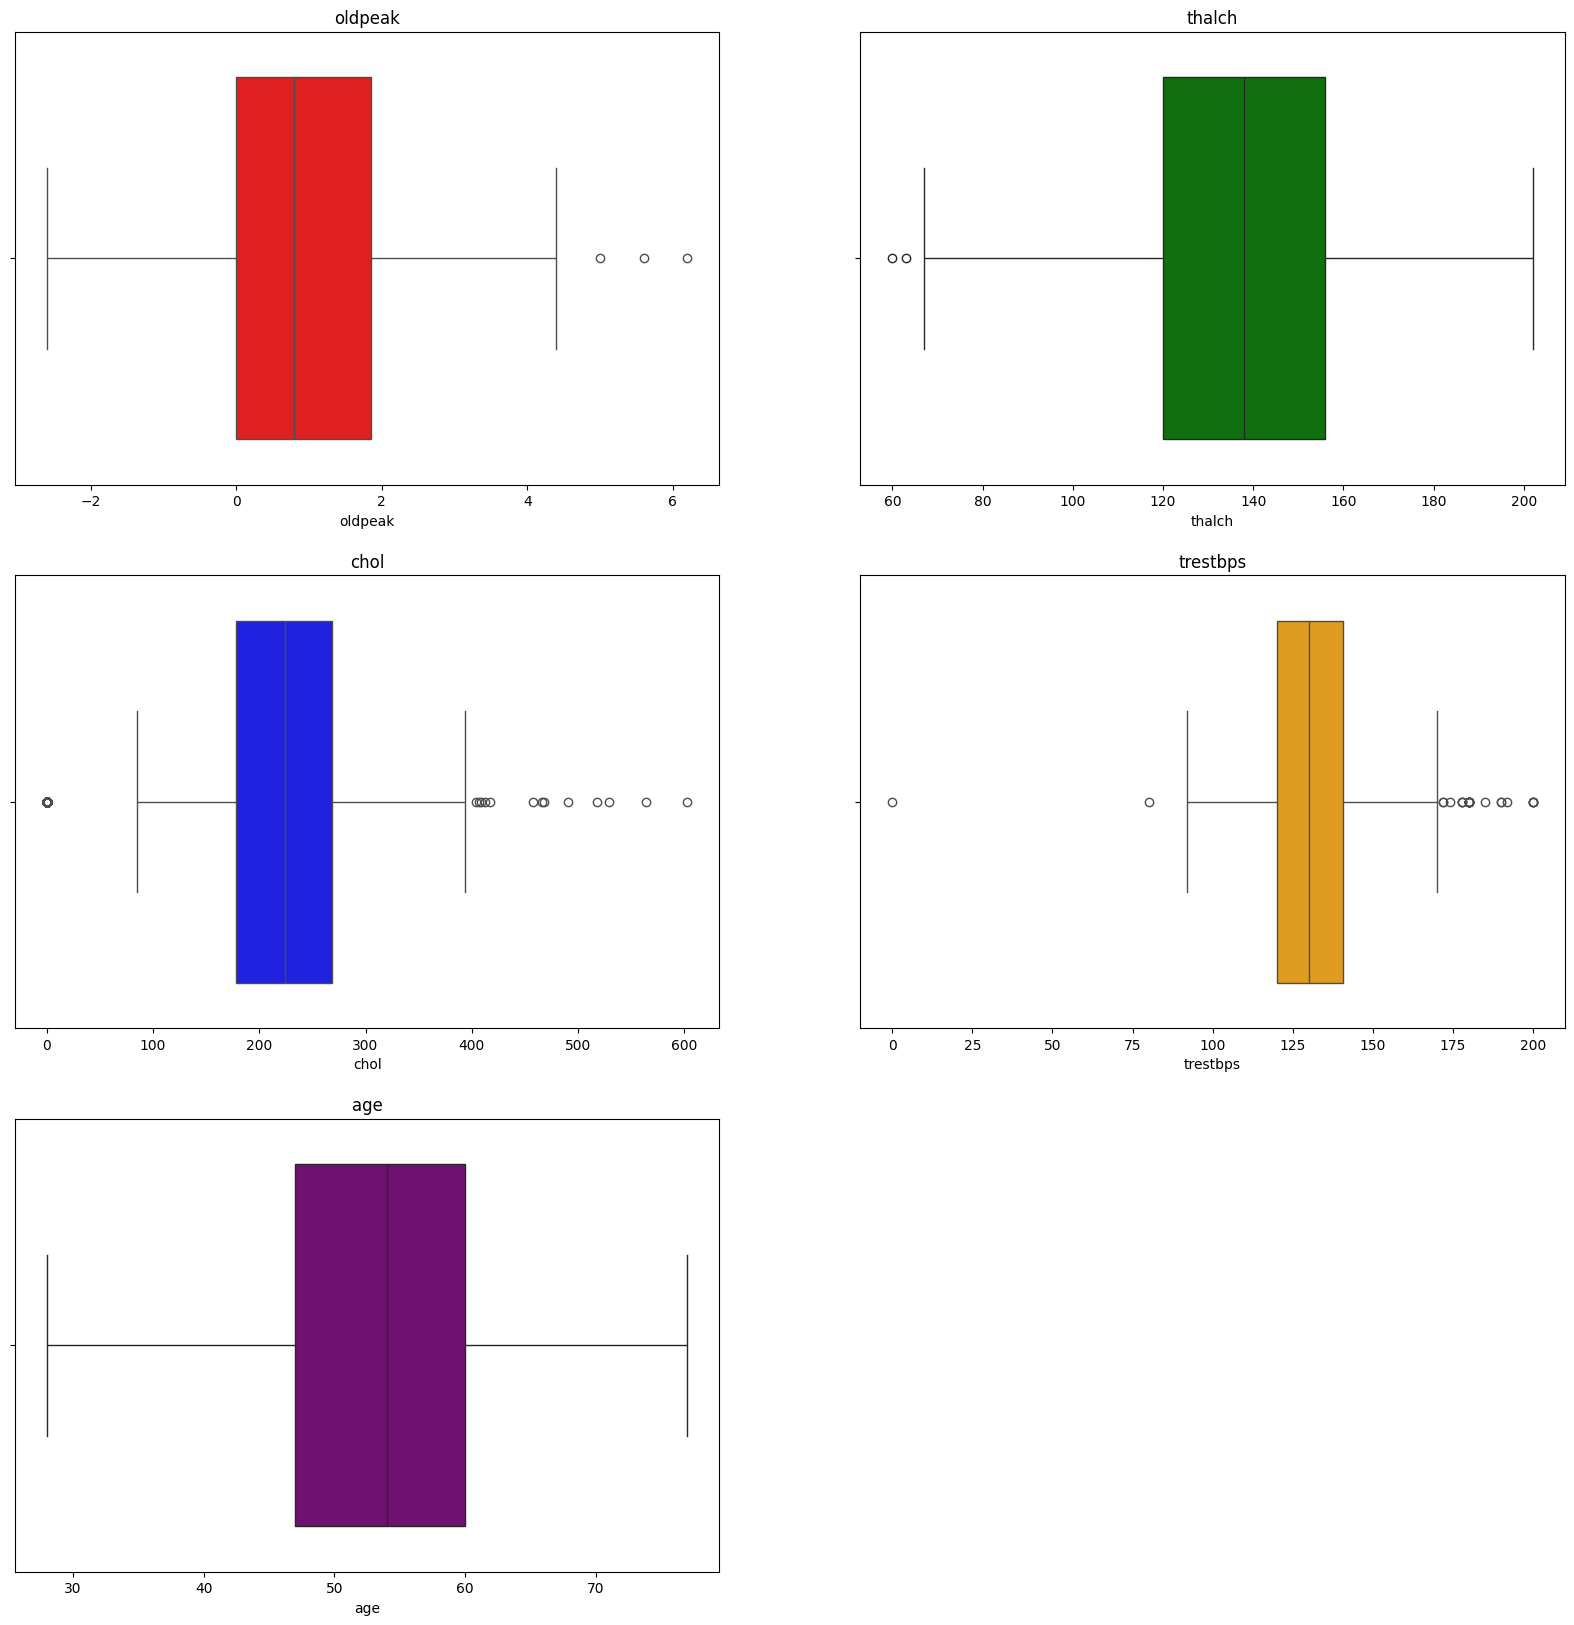

In [132]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()